Este proyecto consiste en tomar los registros de las ventas que se hicieron en el mes de Octubre del año 2023, de una tienda de comercio electrónico (Dropshipping). Se va a realizar un proceso análisis de datos y tomar los insights fundamentales del rendimiento de este mes respondiendo a todo tipo de preguntas como:

1. Contar la cantidad de registros realizados
2. Contar cuantos pedidos fueron entregados, devueltos, cancelados, etc (por status)
3. Contar la cantidad de tipos de envío
4. Top 5 de ciudades de destino tanto por cantidad de pedidos, como entregados y devoluciones de pedidos
5. Evaluar rendimiento de transportadora realizar una matriz de transportadora vs estado
6. Sacar las guías entregadas que aún no han sido pagadas
7. cual fue la gananacia total (total vendido - valor flete - pago por producto a proveedor)
8. cuanto fue lo perdido en devoluciones
9. un archivo excel que muestre todas las guias que no tienen numeros de guía, con descripción de su estado
10. analizar aspectos importantes y a tener en cuenta para un gerente del movimiento de cartera 

se indicara como comentario la respuesta de para cada item mencionado para este proyecto

Se importan las librerías importantes para desarrollar este proyecto:
se definen los datos con los que se va a realizar el proyecto

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
import locale
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=2)

ruta1 = "./comercial orden fila oct 2023.xlsx"
ruta2 = "./comercial historial de cartera oct 2023.xlsx"

comercialOrigen = pd.read_excel(ruta1)        # Datos adquiridos de todos los registros del mes de noviembre 2023
comercialHistorialOrigen = pd.read_excel(ruta2)# Datos adquiridos del historial de cartera de la tienda nov 2023

Exploración de los datos: Diagnosticar el estado de los datos registrados en la tienda comercial, evaluar utilidad de las columnas y reducir columnas:

Del siguiente codigo se sabe que : 
* hay 2610 datos (respuesta a la pregunta 1)
* hay 45 columnas

In [50]:
display(comercialOrigen.info()) # respuesta a la pregunta 1
print('\n ----------------------------------------- \n')
display(comercialOrigen.describe())
print('\n ----------------------------------------- \n')
display(comercialOrigen.tail())
print('\n ----------------------------------------- \n')
comercialOrigen.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA DE REPORTE                  2610 non-null   object 
 1   ID                                2610 non-null   int64  
 2   HORA                              2610 non-null   object 
 3   FECHA                             2610 non-null   object 
 4   NOMBRE CLIENTE                    2610 non-null   object 
 5   TELÉFONO                          2610 non-null   int64  
 6   EMAIL                             2 non-null      object 
 7   TIPO DE IDENTIFICACION            0 non-null      float64
 8   NRO DE IDENTIFICACION             0 non-null      float64
 9   NÚMERO GUIA                       1693 non-null   float64
 10  ESTATUS                           2610 non-null   object 
 11  TIPO DE ENVIO                     2610 non-null   object 
 12  DEPART

None


 ----------------------------------------- 



,ID,TELÉFONO,TIPO DE IDENTIFICACION,NRO DE IDENTIFICACION,NÚMERO GUIA,VALOR DE COMPRA EN PRODUCTOS,GANANCIA,PRECIO FLETE,COMISION,TOTAL EN PRECIOS DE PROVEEDOR,OBSERVACIÓN,ID DE ORDEN DE TIENDA,NUMERO DE PEDIDO DE TIENDA,TAGS
count,2.610000e+03,2.610000e+03,0.0,0.0,1.693000e+03,2610.000000,796.000000,2610.000000,0.0,2610.000000,0.0,1.912000e+03,1912.000000,0.0
mean,1.017662e+07,4.878201e+09,NaN,NaN,6.097494e+12,68920.616858,39554.870603,15039.735441,NaN,14279.463602,NaN,4.615857e+12,8375.487971,NaN
std,2.502502e+05,2.834294e+10,NaN,NaN,2.195207e+13,10663.932212,6712.031038,4520.937898,NaN,5094.955729,NaN,5.755655e+09,559.976536,NaN
min,9.799955e+06,1.024527e+09,NaN,NaN,2.402399e+10,52855.000000,0.000000,8955.000000,NaN,11500.000000,NaN,4.605966e+12,7386.000000,NaN
25%,9.939471e+06,3.112958e+09,NaN,NaN,2.402404e+10,63000.000000,37250.000000,13450.000000,NaN,11500.000000,NaN,4.610831e+12,7893.750000,NaN
50%,1.021247e+07,3.143722e+09,NaN,NaN,2.402415e+10,63000.000000,37750.000000,13760.000000,NaN,11500.000000,NaN,4.615872e+12,8373.500000,NaN
75%,1.036133e+07,3.206892e+09,NaN,NaN,3.639041e+10,63000.000000,40340.000000,15500.000000,NaN,11500.000000,NaN,4.618892e+12,8862.250000,NaN
max,1.069885e+07,5.841498e+11,NaN,NaN,8.591040e+13,88000.000000,53740.000000,37650.000000,NaN,75000.000000,NaN,4.628179e+12,9343.000000,NaN



 ----------------------------------------- 



,FECHA DE REPORTE,ID,HORA,FECHA,NOMBRE CLIENTE,TELÉFONO,EMAIL,TIPO DE IDENTIFICACION,NRO DE IDENTIFICACION,NÚMERO GUIA,...,UBICACIÓN DE ÚLTIMO MOVIMIENTO,VENDEDOR,TIPO DE TIENDA,TIENDA,ID DE ORDEN DE TIENDA,NUMERO DE PEDIDO DE TIENDA,TAGS,FECHA GENERACION DE GUIA,USUARIO GENERACION DE GUIA,USUARIO QUE SOLUCIONA LA NOVEDAD
2605,10-01-2024,9800673,09:45,02-10-2023,Guillermo Guachavez,3137393347,NaN,NaN,NaN,2.400062e+11,...,NaN,Comercial DianaMartinez,NaN,NaN,NaN,NaN,NaN,02/10/2023,STOCKAGO DROPI STOCK,NaN
2606,10-01-2024,9800294,09:42,02-10-2023,Javier antonio Cano gomez,3212716204,NaN,NaN,NaN,2.402399e+10,...,ESTADO,Comercial DianaMartinez,NaN,NaN,NaN,NaN,NaN,02/10/2023,STOCKAGO DROPI STOCK,NaN
2607,10-01-2024,9800217,09:41,02-10-2023,Ángel Gonzales,3125348972,NaN,NaN,NaN,2.400062e+11,...,NaN,Comercial DianaMartinez,NaN,NaN,NaN,NaN,NaN,02/10/2023,STOCKAGO DROPI STOCK,NaN
2608,10-01-2024,9800005,09:36,02-10-2023,Nelsi Romero,3246365846,NaN,NaN,NaN,2.400062e+11,...,NaN,Comercial DianaMartinez,NaN,NaN,NaN,NaN,NaN,02/10/2023,STOCKAGO DROPI STOCK,NaN
2609,10-01-2024,9799955,09:35,02-10-2023,Laura perilla,3177452607,NaN,NaN,NaN,2.400062e+11,...,NaN,Comercial DianaMartinez,NaN,NaN,NaN,NaN,NaN,02/10/2023,STOCKAGO DROPI STOCK,NaN



 ----------------------------------------- 



Index(['FECHA DE REPORTE', 'ID', 'HORA', 'FECHA', 'NOMBRE CLIENTE', 'TELÉFONO',
       'EMAIL', 'TIPO DE IDENTIFICACION', 'NRO DE IDENTIFICACION',
       'NÚMERO GUIA', 'ESTATUS', 'TIPO DE ENVIO', 'DEPARTAMENTO DESTINO',
       'CIUDAD DESTINO', 'DIRECCION', 'NOTAS', 'TRANSPORTADORA',
       'VALOR DE COMPRA EN PRODUCTOS', 'GANANCIA', 'PRECIO FLETE',
       'COSTO DEVOLUCION FLETE', 'COMISION', 'TOTAL EN PRECIOS DE PROVEEDOR',
       'NOVEDAD', 'FUE SOLUCIONADA LA NOVEDAD', 'HORA DE NOVEDAD',
       'FECHA DE NOVEDAD', 'SOLUCIÓN', 'HORA DE SOLUCIÓN', 'FECHA DE SOLUCIÓN',
       'OBSERVACIÓN', 'HORA DE ÚLTIMO MOVIMIENTO',
       'FECHA DE ÚLTIMO MOVIMIENTO', 'ÚLTIMO MOVIMIENTO',
       'CONCEPTO ÚLTIMO MOVIMIENTO', 'UBICACIÓN DE ÚLTIMO MOVIMIENTO',
       'VENDEDOR', 'TIPO DE TIENDA', 'TIENDA', 'ID DE ORDEN DE TIENDA',
       'NUMERO DE PEDIDO DE TIENDA', 'TAGS', 'FECHA GENERACION DE GUIA',
       'USUARIO GENERACION DE GUIA', 'USUARIO QUE SOLUCIONA LA NOVEDAD'],
      dtype='object')

Del análisis anterior y exploración, se seleccionaran solo las columnas relevantes para la inteligencia de negocios,
reduciendose a solo 15 columnas.

En el codigo se evidencia cuales son las que se escogieron y se toman solo los registros del mes de Octubre

In [51]:
comercialLimpio = comercialOrigen[['ID', 'FECHA', 'NOMBRE CLIENTE', 'TELÉFONO',
                            'NÚMERO GUIA', 'ESTATUS', 'TIPO DE ENVIO', 'DEPARTAMENTO DESTINO',
                            'CIUDAD DESTINO',  'TRANSPORTADORA',
                            'VALOR DE COMPRA EN PRODUCTOS', 'GANANCIA', 'PRECIO FLETE',
                            'COSTO DEVOLUCION FLETE', 'TOTAL EN PRECIOS DE PROVEEDOR']]
comercialLimpio['FECHA'] = pd.to_datetime(comercialLimpio['FECHA'])
comercialLimpio = comercialLimpio[comercialLimpio['FECHA'].dt.month == 10]
comercialLimpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             2610 non-null   int64         
 1   FECHA                          2610 non-null   datetime64[ns]
 2   NOMBRE CLIENTE                 2610 non-null   object        
 3   TELÉFONO                       2610 non-null   int64         
 4   NÚMERO GUIA                    1693 non-null   float64       
 5   ESTATUS                        2610 non-null   object        
 6   TIPO DE ENVIO                  2610 non-null   object        
 7   DEPARTAMENTO DESTINO           2610 non-null   object        
 8   CIUDAD DESTINO                 2610 non-null   object        
 9   TRANSPORTADORA                 2610 non-null   object        
 10  VALOR DE COMPRA EN PRODUCTOS   2610 non-null   int64         
 11  GANANCIA         

Tomaremos 3 conjuntos de datos:

1. Conjunto de datos general (comercialLimpio)
2. Conjunto de datos con guia generada (comercialLimpio_conGG)
3. Conjunto de datos sin guia generada (comercialLimpio_sinGG)

Según lo que se observa:

* 1693 ordenes en las que se generaron guía
* 917 ordenes en las que no se generaron guía, se procede a eliminar para esta tabla, las columnas de NUMERO DE GUIA,
  GANANCIA, COSTO DEVOLUCION FLETE


In [52]:
comercialLimpio_conGG = comercialLimpio[comercialLimpio['NÚMERO GUIA'].notna()]
comercialLimpio_sinGG = comercialLimpio[comercialLimpio['NÚMERO GUIA'].isnull()] # solucion al punto 9

display(comercialLimpio_conGG.info())
print('\n--------------------------------------------\n')
display(comercialLimpio_sinGG.info())

comercialLimpio_sinGG = comercialLimpio_sinGG.drop(['NÚMERO GUIA', 'GANANCIA', 'COSTO DEVOLUCION FLETE'], axis=1)


<class 'pandas.core.frame.DataFrame'>
Index: 1693 entries, 0 to 2609
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             1693 non-null   int64         
 1   FECHA                          1693 non-null   datetime64[ns]
 2   NOMBRE CLIENTE                 1693 non-null   object        
 3   TELÉFONO                       1693 non-null   int64         
 4   NÚMERO GUIA                    1693 non-null   float64       
 5   ESTATUS                        1693 non-null   object        
 6   TIPO DE ENVIO                  1693 non-null   object        
 7   DEPARTAMENTO DESTINO           1693 non-null   object        
 8   CIUDAD DESTINO                 1693 non-null   object        
 9   TRANSPORTADORA                 1693 non-null   object        
 10  VALOR DE COMPRA EN PRODUCTOS   1693 non-null   int64         
 11  GANANCIA              

None


--------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 1 to 2599
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             917 non-null    int64         
 1   FECHA                          917 non-null    datetime64[ns]
 2   NOMBRE CLIENTE                 917 non-null    object        
 3   TELÉFONO                       917 non-null    int64         
 4   NÚMERO GUIA                    0 non-null      float64       
 5   ESTATUS                        917 non-null    object        
 6   TIPO DE ENVIO                  917 non-null    object        
 7   DEPARTAMENTO DESTINO           917 non-null    object        
 8   CIUDAD DESTINO                 917 non-null    object        
 9   TRANSPORTADORA                 917 non-null    object        
 10  VALOR DE COMPRA EN PRODUCTOS   917 non-null

None

Tenemos una alta tasa de devolución 

Recomendación

*Evaluar en el equipo comercial como se ha gestionado las novedades en el mes de noviembre 2023, ya que este supera a los pedidos entregados, y supervisar y acompañar mas de cerca al personal comercial encargado de la gestión de novedades; al igual que los pedidos en estado de confirmación, ya que estos pedidos deben de pasarse a pendiente para que los proveedores procedan a hacer el empaque

*No hay pedidos pendientes, esto indica que el trabajo de despacho por parte de los proveedores es exitoso

*Comunicar a las transportadoras aquellos estados por debajo del 5% y actualizar sus estados

,valores,frecuencia,Porcentaje
0,DEVOLUCION,843,32.3%
1,ENTREGADO,794,30.42%
2,CANCELADO,781,29.92%
3,PENDIENTE CONFIRMACION,132,5.06%
4,GUIA_GENERADA,45,1.72%
5,NOVEDAD SOLUCIONADA,7,0.27%
6,RECHAZADO,3,0.11%
7,NOVEDAD,2,0.08%
8,PENDIENTE,1,0.04%
9,EN ESPERA DE RUTA DOMESTICA,1,0.04%


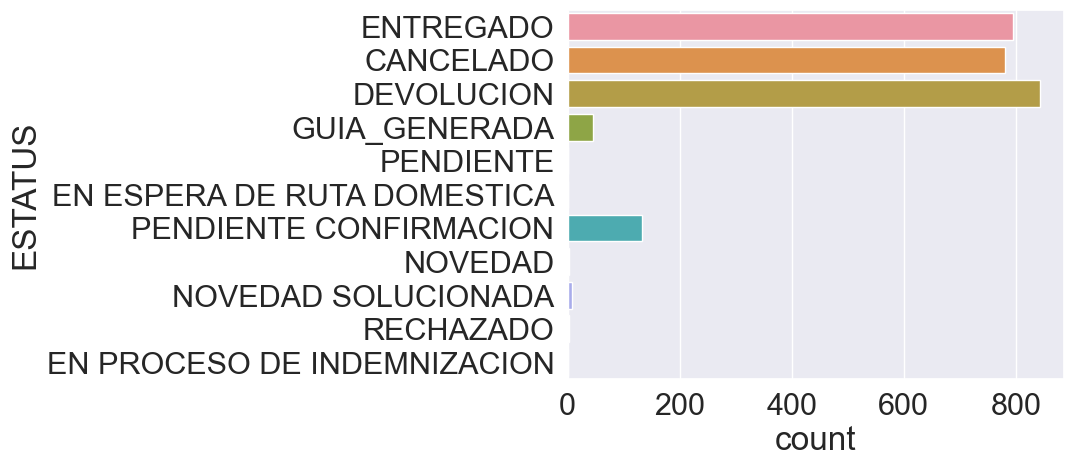

In [53]:
# resolución del punto 2

ax = sns.countplot(y='ESTATUS', data=comercialLimpio, orient='h')
ax.set_xticklabels(ax.get_xticklabels())
conteo_estado = comercialLimpio['ESTATUS'].value_counts()
porcent_est = (conteo_estado / len(comercialLimpio['ESTATUS'])) * 100
porcent_est = porcent_est.round(2).astype(str) +'%'
resultados = pd.DataFrame({'valores': conteo_estado.index, 'frecuencia':conteo_estado.values, 'Porcentaje':porcent_est.values})
display(resultados)

Es evidente que el modelo de pago para los envíos es contraentrega, todavía no hay posibilidades de convertir a una modalidad de pago por anticipado por parte de los clientes.

Realizar encuestas de que es lo que le impide a los clientes realizar pagos por anticipado por las compras

,valores,frecuencia,Porcentaje
0,CON RECAUDO,2607,99.89%
1,SIN RECAUDO,3,0.11%


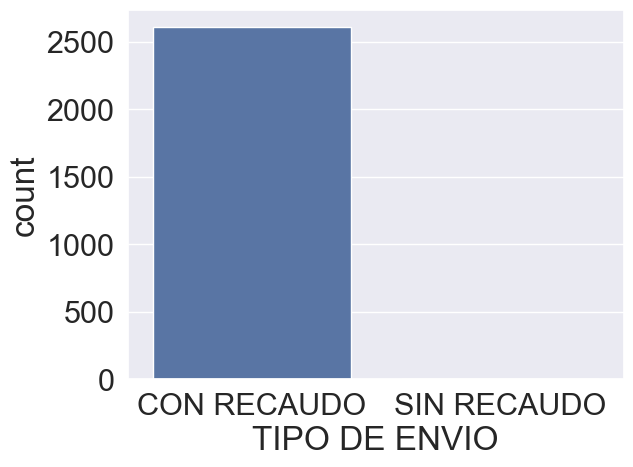

In [54]:
# resolución del punto 3

ax = sns.countplot(x='TIPO DE ENVIO', data=comercialLimpio)
ax.set_xticklabels(ax.get_xticklabels())
conteo_estado = comercialLimpio['TIPO DE ENVIO'].value_counts()
porcent_est = (conteo_estado / len(comercialLimpio['TIPO DE ENVIO'])) * 100
porcent_est = porcent_est.round(2).astype(str) +'%'
resultados = pd.DataFrame({'valores': conteo_estado.index, 'frecuencia':conteo_estado.values, 'Porcentaje':porcent_est.values})
display(resultados)

Evaluando el volumen de pedidos por ciudad:
La cantidad de ciudades que realizaron al menos una compra son 442, en el codigo se pueden observar todas las ciudades o municipios que participaron en alguna compra.

Recomendaciones:

*Si se desea economizar pago de pauta, segmentar marketing a las ciudades principales del país que son: Bogotá, Medellín, Cali, Cartagena y Barranquilla, y se puede realizar expansión a ciudades como Cúcuta Bucaramanga y Santa Marta

Cantidad de ciudades listadas = 442

 

['SEVILLA' 'COROZAL' 'SAN FRANCISCO' 'BUENAVISTA (COR)' 'MEDELLIN'
 'CARTAGENA' 'PUERTO ASIS' 'SANTA MARTA' 'BOGOTA' 'FUSAGASUGA' 'YOPAL'
 'RIONEGRO (ANT)' 'SIBATE' 'SAN MARCOS' 'COTA' 'CERETE' 'PASTO' 'YARUMAL'
 'COROMORO' 'GIRARDOT' 'ITAGUI' 'BARRANQUILLA' 'DORADAL'
 'LA APARTADA Y LA FRONTERA' 'SANTIAGO' 'HATO COROZAL' 'ARAUCA' 'CUCUTA'
 'SOLEDAD' 'BECERRIL' 'QUIBDO' 'PRADERA' 'RICAURTE' 'SAN JOSE DEL FRAGUA'
 'EL ZULIA' 'FACATATIVA' 'LA CEJA' 'TAME' 'CARACOLI' 'SARAVENA' 'OROCUE'
 'IBAGUE' 'MOMPOS' 'FLORENCIA' 'CARCASI' 'YUMBO' 'LA MESA' 'CALI'
 'MAGANGUE' 'VILLAVICENCIO' 'SOGAMOSO' 'VISTAHERMOSA' 'ACACIAS' 'SOCORRO'
 'BARRANCA DE UPIA' 'PEREIRA' 'BUCARAMANGA' 'ARMENIA (Q)' 'MONTERIA'
 'FLORIDABLANCA' 'SINCELEJO' 'GRANADA (M)' 'APARTADO' 'CISNEROS' 'POPAYAN'
 'MOSQUERA' 'OCAÑA' 'SANTA ROSA DE OSOS' 'ANAPOIMA'
 'SANTANDER DE QUILICHAO' 'PAZ DE ARIPORO' 'MALAMBO' 'TIBANA' 'URIBIA'
 'PITALITO' 'MONTELIBANO' 'LA HORMIGA' 'PLATO' 'PLANETA RICA'
 '

,CIUDAD DESTINO,Cantidad de pedidos
39,BOGOTA,315
225,MEDELLIN,148
54,CALI,118
31,BARRANQUILLA,103
64,CARTAGENA,69
41,BUCARAMANGA,45
352,SANTA MARTA,43
103,CUCUTA,36
430,VILLAVICENCIO,33
266,PASTO,30


,CIUDAD DESTINO,Cantidad de pedidos
24,BOGOTA,87
33,CALI,43
128,MEDELLIN,39
20,BARRANQUILLA,31
39,CARTAGENA,20


,CIUDAD DESTINO,Cantidad de pedidos
30,BOGOTA,107
141,MEDELLIN,56
40,CALI,37
23,BARRANQUILLA,34
206,SANTA MARTA,18


Text(0.5, 1.0, 'Devolución')

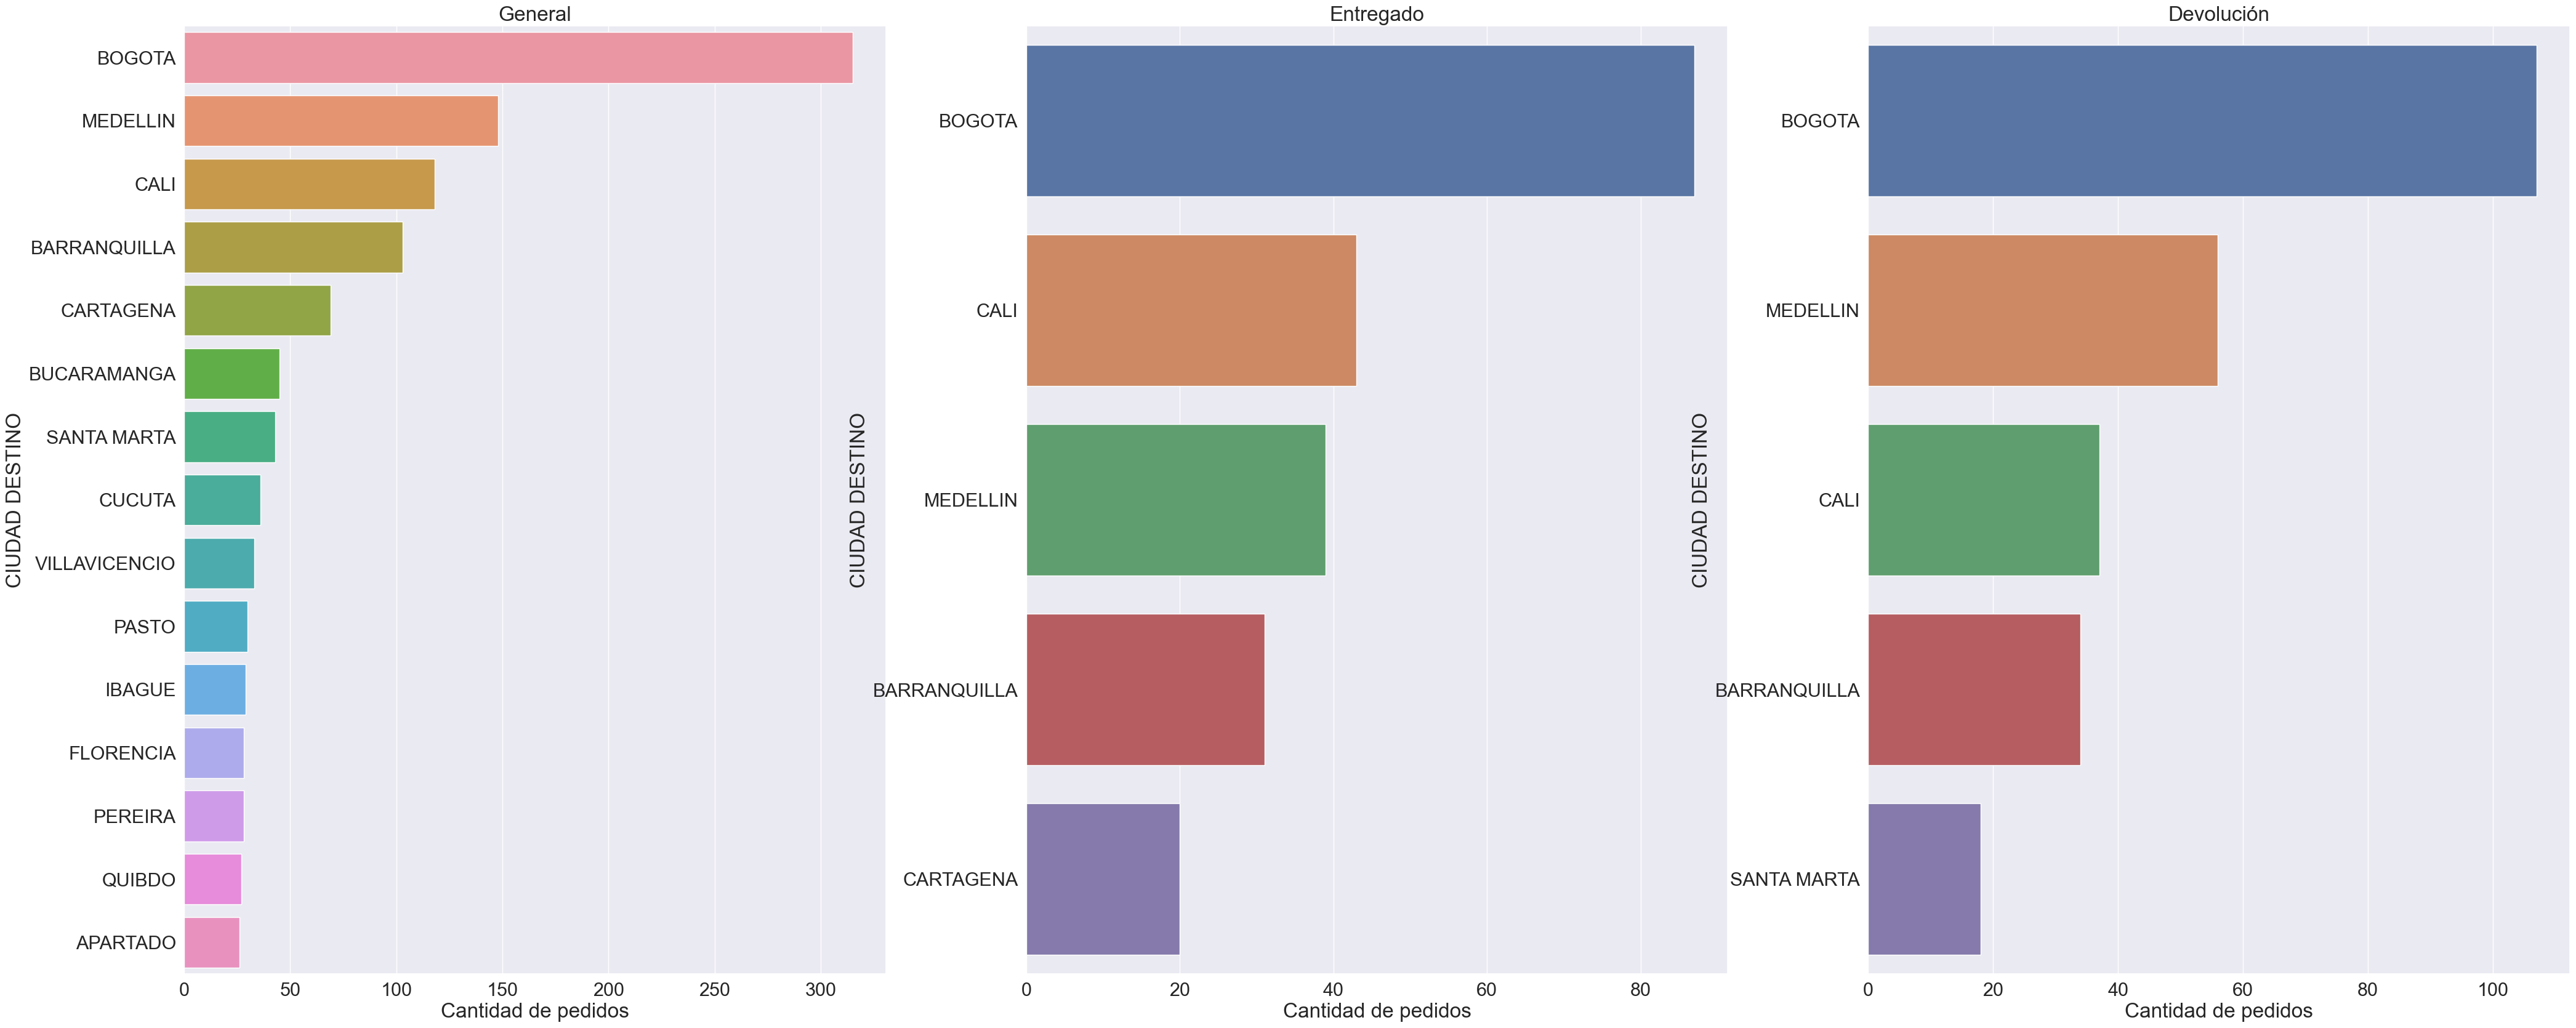

In [55]:
# resolución punto 4

ciudad_top = comercialLimpio.groupby('CIUDAD DESTINO')['ESTATUS'].count().reset_index()
ciudad_top = ciudad_top.rename(columns= {'ESTATUS' : 'Cantidad de pedidos'})
ciudad_top = ciudad_top.nlargest(15, 'Cantidad de pedidos')

ciudad_top_ent = comercialLimpio[comercialLimpio['ESTATUS'] == 'ENTREGADO']
ciudad_top_ent = ciudad_top_ent.groupby('CIUDAD DESTINO')['ESTATUS'].count().reset_index()
ciudad_top_ent = ciudad_top_ent.rename(columns= {'ESTATUS' : 'Cantidad de pedidos'})
ciudad_top_ent = ciudad_top_ent.nlargest(5, 'Cantidad de pedidos')

ciudad_top_dev = comercialLimpio[comercialLimpio['ESTATUS'] == 'DEVOLUCION']
ciudad_top_dev = ciudad_top_dev.groupby('CIUDAD DESTINO')['ESTATUS'].count().reset_index()
ciudad_top_dev = ciudad_top_dev.rename(columns= {'ESTATUS' : 'Cantidad de pedidos'})
ciudad_top_dev = ciudad_top_dev.nlargest(5, 'Cantidad de pedidos')

print('Cantidad de ciudades listadas = ' + str(len(comercialLimpio['CIUDAD DESTINO'].unique())))
print('\n \n')
print(comercialLimpio['CIUDAD DESTINO'].unique())
print('\n \n')
display(ciudad_top)
display(ciudad_top_ent)
display(ciudad_top_dev)


fig, ax = plt.subplots(1,3,figsize=(50,20))
sns.barplot(y='CIUDAD DESTINO', x='Cantidad de pedidos', data=ciudad_top, orient='h', ax=ax[0])
sns.barplot(y='CIUDAD DESTINO', x='Cantidad de pedidos', data=ciudad_top_ent, orient='h', ax=ax[1])
sns.barplot(y='CIUDAD DESTINO', x='Cantidad de pedidos', data=ciudad_top_dev, orient='h', ax=ax[2])

ax[0].set_title('General')
ax[1].set_title('Entregado')
ax[2].set_title('Devolución')


Rendimiento de transportadora

Por lo visto, el mayor volumen de pedidos enviados ha sido con las transportadoras ENVIA E INTERRAPIDISIMO, ya que tienen los porcentajes mas bajos para sus devoluciones, y el porcentaje mas alto en sus entregas.

Cabe destacar que INTERRAPIDISIMO tiene un buen rendimiento para zonas muy retiradas de las ciudades principales del país, y ENVIA tiene un buen desempeño para todas las ciudad y municipios cercanos el eje cafetero

TRANSPORTADORA,COORDINADORA,DOMINA,ENVIA,INTERRAPIDISIMO
ESTATUS,,,,
DEVOLUCION,45,68,607,123
EN ESPERA DE RUTA DOMESTICA,0,0,1,0
EN PROCESO DE INDEMNIZACION,0,0,1,0
ENTREGADO,33,51,562,148
GUIA_GENERADA,2,0,32,11
NOVEDAD,0,0,2,0
NOVEDAD SOLUCIONADA,0,0,7,0


TRANSPORTADORA,COORDINADORA,DOMINA,ENVIA,INTERRAPIDISIMO
ESTATUS,,,,
DEVOLUCION,56.25%,57.14%,50.08%,43.62%
EN ESPERA DE RUTA DOMESTICA,0.0%,0.0%,0.08%,0.0%
EN PROCESO DE INDEMNIZACION,0.0%,0.0%,0.08%,0.0%
ENTREGADO,41.25%,42.86%,46.37%,52.48%
GUIA_GENERADA,2.5%,0.0%,2.64%,3.9%
NOVEDAD,0.0%,0.0%,0.17%,0.0%
NOVEDAD SOLUCIONADA,0.0%,0.0%,0.58%,0.0%


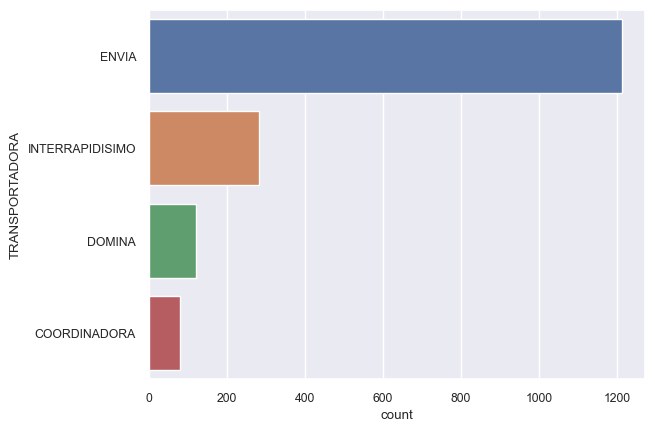

In [56]:
# Resolucion punto 5

transp_estat = pd.crosstab(comercialLimpio_conGG['ESTATUS'], comercialLimpio_conGG['TRANSPORTADORA'])
transp_estat_porc = pd.crosstab(comercialLimpio_conGG['ESTATUS'], comercialLimpio_conGG['TRANSPORTADORA'], normalize='columns') * 100
transp_estat_porc = transp_estat_porc.round(2).astype(str)+'%'
display(transp_estat)
print(' \n ')
display(transp_estat_porc)
sns.set(font_scale=0.8)
ax = sns.countplot(y='TRANSPORTADORA', data=comercialLimpio_conGG, orient='h')


La cantidad de guias sin pagar son 4 registros

en los pedidos que son por medio de la transportadora DOMINA, averiguar porque aparecen en la columna GANANCIA el valor de 0

In [57]:
# resolución del punto 6

comercialHistorialOrigen.info()
comercialHistorialOrigen_limpio = comercialHistorialOrigen

# Cambiamos la descripción de cada registro de historial de cartera por un valor general y descriptivo

comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'ENTRADA GANANCIA DROPSHIPPER' if 'ENTRADA POR GANANCIA EN LA ORDEN COMO DROPSHIPPER' in x else x)
comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'COBRO DEVOLUCION POR NO ENTREGA' if 'SALIDA DE COBRO DE DEVOLUCION POR ENTREGA NO EFECTIVA' in x else x)
comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'COBRO FULLFILLMENT POR NO ENTREGA' if 'SALIDA POR COBRO DE FULFILLMENT POR ENTREGA NO EFECTIVA' in x else x)
comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'RECARGA CARTERA' if 'RECARGA DE SALDO EN CARTERA' in x else x)
comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'DEVOLUCION FLETE' if 'DEVOLUCION DE FLETE ORDEN ENTREGADA' in x else x)
comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'ENTRADA X RETIRO TARJETA CREDITO' if 'ENTRADA POR RETIRO DE TARJETA DE CREDITO' in x else x)
comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'CORRECCION COBRO DEVOLUCION' if 'CORRECCION POR COBRO DE DEVOLUCION' in x else x)
comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'SALIDA MANTENIMIENTO MENSUAL TARJETA VIRTUAL' if 'SALIDA POR MANTENIMIENTO MENSUAL TARJETA VIRTUAL' in x else x)
comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'SALIDA RECARGA DE T CREDITO' if 'SALIDA POR RECARGA DE TARJETA DE CREDITO' in x else x)
comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'SALIDA NUEVA ORDEN' if 'SALIDA POR NUEVA ORDEN' in x else x)
comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'SALIDA RECARGA DE T CREDITO' if 'SALIDA POR RECARGA DE TARJETA DE CREDITO' in x else x)
comercialHistorialOrigen_limpio['DESCRIPCIÓN'] = comercialHistorialOrigen['DESCRIPCIÓN'].apply(lambda x: 'RET. ADMIN' if 'RET. ADMIN' in x else x)
print('\n--- Verificamos que todos los valores en descripción hayan sido cambiado por categorías generales ---\n')
print(comercialHistorialOrigen_limpio['DESCRIPCIÓN'].unique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4994 non-null   int64  
 1   FECHA           4994 non-null   object 
 2   TIPO            4994 non-null   object 
 3   MONTO           4994 non-null   float64
 4   MONTO PREVIO    4994 non-null   float64
 5   ORDEN ID        4928 non-null   float64
 6   NUMERO DE GUIA  4928 non-null   float64
 7   DESCRIPCIÓN     4994 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 312.3+ KB

--- Verificamos que todos los valores en descripción hayan sido cambiado por categorías generales ---

['COBRO DEVOLUCION POR NO ENTREGA' 'COBRO FULLFILLMENT POR NO ENTREGA'
 'SALIDA RECARGA DE T CREDITO' 'ENTRADA GANANCIA DROPSHIPPER'
 'SALIDA POR PETICION DE RETIRO DE SALDO EN CARTERA' 'RECARGA CARTERA'
 'DEVOLUCION FLETE' 'SALIDA NUEVA ORDEN'
 'ENTRADA X RETIRO TARJETA CRED

In [58]:
gananciaDrops = comercialHistorialOrigen_limpio[comercialHistorialOrigen['DESCRIPCIÓN'] == 'ENTRADA GANANCIA DROPSHIPPER']
cruceComercialHistorial_pagoPedido = pd.merge(comercialLimpio_conGG, gananciaDrops, left_on='NÚMERO GUIA', right_on='NUMERO DE GUIA', how='left')


cruceComercialHistorial_pagoPedido = cruceComercialHistorial_pagoPedido[['NÚMERO GUIA','ESTATUS','TRANSPORTADORA',
                                                                        'VALOR DE COMPRA EN PRODUCTOS', 'GANANCIA', 'PRECIO FLETE',
                                                                        'COSTO DEVOLUCION FLETE','TOTAL EN PRECIOS DE PROVEEDOR','MONTO',
                                                                        'NUMERO DE GUIA', 'DESCRIPCIÓN']]

cruceComercialHistorial_pagoPedido = cruceComercialHistorial_pagoPedido[cruceComercialHistorial_pagoPedido['ESTATUS'] == 'ENTREGADO']
sinPagar = cruceComercialHistorial_pagoPedido[pd.isna(cruceComercialHistorial_pagoPedido['MONTO'])]
sinPagar['NÚMERO GUIA'] = sinPagar['NÚMERO GUIA'].astype(float)
display(sinPagar)

,NÚMERO GUIA,ESTATUS,TRANSPORTADORA,VALOR DE COMPRA EN PRODUCTOS,GANANCIA,PRECIO FLETE,COSTO DEVOLUCION FLETE,TOTAL EN PRECIOS DE PROVEEDOR,MONTO,NUMERO DE GUIA,DESCRIPCIÓN
125,2.402427e+10,ENTREGADO,ENVIA,88000,32400.0,32600.0,NaN,23000,NaN,NaN,NaN
269,8.591040e+13,ENTREGADO,DOMINA,83955,0.0,8955.0,NaN,75000,NaN,NaN,NaN
406,8.591040e+13,ENTREGADO,DOMINA,52855,0.0,8955.0,NaN,43900,NaN,NaN,NaN
857,3.404568e+10,ENTREGADO,ENVIA,86900,36300.0,10600.0,NaN,40000,NaN,NaN,NaN


Procedemos a calcular la ganancia total para el mes de octubre fue de $22,226,559. Dentro de este concepto ya se cobro el flete y el valor de cobro por parte del proveedor sobre el producto, ya que el sistema deduce inmediatamente despues del pago de una orden, lo que corresponde a cada quien

In [59]:
# Resolución al punto 7 

ganancia = comercialHistorialOrigen_limpio
ganancia['FECHA'] = pd.to_datetime(ganancia['FECHA'])
ganancia = ganancia[ganancia['FECHA'].dt.month == 10]
suma_concepto = ganancia.groupby('DESCRIPCIÓN')['MONTO'].sum().reset_index()
#suma_concepto = suma_concepto.rename(columns={suma_concepto.columns[1]: 'MONTO'})
ganancia_neta = suma_concepto['MONTO'][2] - suma_concepto['MONTO'][0] - suma_concepto['MONTO'][5]
ganancia_neta = "${:,.0f}".format(ganancia_neta)
print('la ganancia neta fue de:')
print(ganancia_neta)
suma_concepto['MONTO'] = suma_concepto['MONTO'].astype(int).map('${:,.1f}'.format)
suma_concepto

la ganancia neta fue de:
$22,226,559


,DESCRIPCIÓN,MONTO
0,COBRO DEVOLUCION POR NO ENTREGA,"$13,439,886.0"
1,COBRO FULLFILLMENT POR NO ENTREGA,$0.0
2,ENTRADA GANANCIA DROPSHIPPER,"$35,691,445.0"
3,RECARGA CARTERA,"$3,500,000.0"
4,RET. ADMIN,"$3,500,000.0"
5,SALIDA MANTENIMIENTO MENSUAL TARJETA VIRTUAL,"$25,000.0"
6,SALIDA NUEVA ORDEN,"$187,410.0"
7,SALIDA POR PETICION DE RETIRO DE SALDO EN CARTERA,"$944,100.0"
8,SALIDA RECARGA DE T CREDITO,"$24,399,000.0"


El dinero  Perdido en devoluciones para el mes de octubre fue de $13,439,886

In [60]:
# Resolución del punto numero 8

perdidasDev = comercialHistorialOrigen_limpio[comercialHistorialOrigen['DESCRIPCIÓN'].isin(['COBRO DEVOLUCION POR NO ENTREGA','COBRO FULLFILLMENT POR NO ENTREGA', 'DEVOLUCION FLETE'])]
perdidasDev['FECHA'] = pd.to_datetime(perdidasDev['FECHA'])
perdidasDev = perdidasDev[perdidasDev['FECHA'].dt.month == 10]

display(perdidasDev)
print('\n \n')

sumaPerdidasDev = "${:,.0f}".format(perdidasDev['MONTO'].sum())
print('el dinero perdidos por concepto de pago de flete por devoluciones fue de:')
print(f"{sumaPerdidasDev}")

,ID,FECHA,TIPO,MONTO,MONTO PREVIO,ORDEN ID,NUMERO DE GUIA,DESCRIPCIÓN
2185,39575000,2023-10-31 23:57:00,SALIDA,0.0,1322277.04,10241670.0,2.402414e+10,COBRO FULLFILLMENT POR NO ENTREGA
2186,39572249,2023-10-31 20:14:00,SALIDA,0.0,1322277.04,10362450.0,2.400069e+11,COBRO FULLFILLMENT POR NO ENTREGA
2187,39572248,2023-10-31 20:14:00,SALIDA,15860.0,1338137.04,10362450.0,2.400069e+11,COBRO DEVOLUCION POR NO ENTREGA
2205,39486695,2023-10-30 21:43:00,SALIDA,0.0,647847.04,10303516.0,2.402416e+10,COBRO FULLFILLMENT POR NO ENTREGA
2206,39486677,2023-10-30 21:41:00,SALIDA,0.0,647847.04,10235756.0,2.402413e+10,COBRO FULLFILLMENT POR NO ENTREGA
...,...,...,...,...,...,...,...,...
4938,37427978,2023-10-02 08:05:00,SALIDA,0.0,6577570.04,9532576.0,2.402392e+10,COBRO FULLFILLMENT POR NO ENTREGA
4942,37417989,2023-10-01 11:50:00,SALIDA,0.0,6461600.04,9412290.0,2.400060e+11,COBRO FULLFILLMENT POR NO ENTREGA
4943,37417988,2023-10-01 11:50:00,SALIDA,16760.0,6478360.04,9412290.0,2.400060e+11,COBRO DEVOLUCION POR NO ENTREGA
4944,37417735,2023-10-01 11:05:00,SALIDA,0.0,6478360.04,9391650.0,2.400060e+11,COBRO FULLFILLMENT POR NO ENTREGA



 

el dinero perdidos por concepto de pago de flete por devoluciones fue de:
$13,439,886


Se procede a examinar el archivo de aquellos pedidos en el cual no se generaron guia:

Gran cantidad de estos pedidos fueron cancelados, y comparandose con el total de pedidos registrados para el mes de octubre obtenemos un valor de : 781/2610 = 29,9%, es un valor considerablemente alto, verificar las siguientes razones:

*Los productos que se venden si son de buena calidad
*Correcta asesoría por parte del equipo comercial
*si son varios pedidos repetidos, verificar en landing page y el marketing en campañas para evitar el doble pedido por parte de los destinatarios

,valores,frecuencia,Porcentaje
0,CANCELADO,781,85.17%
1,PENDIENTE CONFIRMACION,132,14.39%
2,RECHAZADO,3,0.33%
3,PENDIENTE,1,0.11%


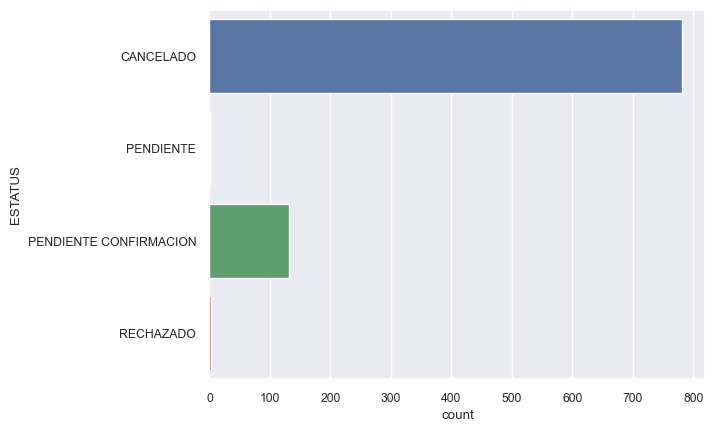

In [61]:

# Solucion del punto 9
ax = sns.countplot(y='ESTATUS', data=comercialLimpio_sinGG, orient='h')
ax.set_xticklabels(ax.get_xticklabels())

conteo_estado2 = comercialLimpio_sinGG['ESTATUS'].value_counts()
porcent_est2 = (conteo_estado2 / len(comercialLimpio_sinGG['ESTATUS'])) * 100
porcent_est2= porcent_est2.round(2).astype(str) +'%'
resultados = pd.DataFrame({'valores': conteo_estado2.index, 'frecuencia':conteo_estado2.values, 'Porcentaje':porcent_est2.values})
display(resultados)

GuiasOct_sinGG = comercialLimpio_sinGG.to_csv('GuiasOct_sinGG', index=False)

se dan anotaciones adicionales en este apartado. Ahora lo que debe de tener en cuenta las directivas de la empresa son las siguientes:

* Verificar el retiro por pago de tarjeta de credito para el pago de pauta en facebook por el valor de $24,399,000.0, ya que si las ganancias fueron de 22,226,559, de este mismo dinero se retira para el pago de de marketing, dando una perdida para el mes de octubre de $2,172,441

* Segun lo que se registro en el historial de cartera, las ganancias de ingresos por concepto de entrada dropshipper fue de:
$35,691,445.0
y lo que se registro de ganancias en los datos comerciales fue de :
$31,396,387

quiere de decir que se recibio de mas, un valor de $4,295,058, por concepto de ganancias entregadas por las ventas del mes de septiembre


In [62]:
# Anexos del punto 10

comercialLimpio_conGG
entregados_ = comercialLimpio_conGG[comercialLimpio_conGG['ESTATUS'] == 'ENTREGADO'] 
totalVenta = entregados_['VALOR DE COMPRA EN PRODUCTOS'].sum()
totalVentaf = "${:,.0f}".format(totalVenta)
gastoFlete = entregados_['PRECIO FLETE'].sum()
gastoFletef = "${:,.0f}".format(gastoFlete)
gastoProd = entregados_['TOTAL EN PRECIOS DE PROVEEDOR'].sum()
gastoProdf = "${:,.0f}".format(gastoProd)
utilidad = "${:,.0f}".format(totalVenta - gastoProd - gastoFlete)
print('las ventas en su totalidad fueron de: ')
print(totalVentaf)
print('\nlos gastos por flete en su totalidad fueron de: ')
print(gastoFletef)
print('\nlos gastos por pago al proveedor por producto en su totalidad fueron de: ')
print(gastoProdf)
print('\nUtilidad: ')
print(utilidad)


las ventas en su totalidad fueron de: 
$54,131,510

los gastos por flete en su totalidad fueron de: 
$11,593,723

los gastos por pago al proveedor por producto en su totalidad fueron de: 
$11,141,400

Utilidad: 
$31,396,387


En este apartado se analizara el conjunto de datos por productos, y se evidencia que solo se vendio el producto de "carillas dentales"

,PRODUCTO,CANTIDAD
0,CARILLAS DENTALES,3227
1,CREMA DESMANCHADORA DE VIDRIOS,2
2,JR2088-1 VERDE RELOJ HOMBRE GIRATORIO,1
3,Plancha Viajera Ropa Tobi Vapor Steamer,1


<Axes: xlabel='CANTIDAD', ylabel='PRODUCTO'>

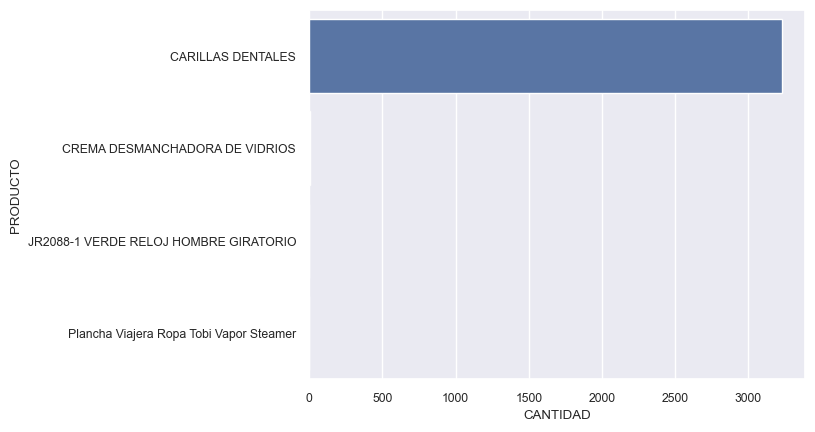

In [83]:
ruta3= './comercial orden prod oct 2023.xlsx'
comercialProduct = pd.read_excel(ruta3)
comercialProduct = comercialProduct[['ID', 'HORA', 'FECHA', 'NOMBRE CLIENTE', 'TELÉFONO',
       'NÚMERO GUIA', 'ESTATUS', 'TIPO DE ENVIO', 'DEPARTAMENTO DESTINO',
       'CIUDAD DESTINO', 'TRANSPORTADORA',
       'TOTAL DE LA ORDEN', 'GANANCIA', 'PRECIO FLETE',
       'PRECIO PROVEEDOR', 'PRECIO PROVEEDOR X CANTIDAD', 'PRODUCTO', 'CANTIDAD']]


comercialProduct.head()

sumaCantProd = comercialProduct.groupby('PRODUCTO')['CANTIDAD'].sum().reset_index()
#print(comercialProduct['PRODUCTO'].unique())
display(sumaCantProd)

sns.barplot(y='PRODUCTO', x='CANTIDAD', data=sumaCantProd, orient='h')